In [33]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
#importing dataset then read the dataset
df=pd.read_csv(r"C:\Users\91781\Downloads\test.csv",  encoding='ISO-8859-1',
    on_bad_lines='skip')

In [3]:
#used view the first few rows of a DataFrame.
df.head(20)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
5,726e501993,that`s great!! weee!! visitors!,positive,night,70-100,Antigua and Barbuda,97929.0,440.0,223.0
6,261932614e,I THINK EVERYONE HATES ME ON HERE lol,negative,morning,0-20,Argentina,45195774.0,2736690.0,17.0
7,afa11da83f,"soooooo wish i could, but im in school and my...",negative,noon,21-30,Armenia,2963243.0,28470.0,104.0
8,e64208b4ef,and within a short time of the last clue all ...,neutral,night,31-45,Australia,25499884.0,7682300.0,3.0
9,37bcad24ca,What did you get? My day is alright.. haven`...,neutral,morning,46-60,Austria,9006398.0,82400.0,109.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [5]:
#find the null values
df.isnull().sum()

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

In [6]:
#used to drop the null value from dataset
df=df.dropna(how='all')
df.isnull().sum()

textID              0
text                0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [7]:
#create a function and pass the dataset(text) for cleaning
def clean(text):
    # Let's start cleaning the text
    text = re.sub(r"\'", " ", text)  # match the quotes and replace
    text = re.sub(r'https?://\S+|www\.\S+|@\w+', ' ', text)
    text = re.sub(r'\xa0', ' ', text)  # match non-breaking space and replace
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', ' ', text)
    text = re.sub(r'\s+', ' ', text)  # match one or more spaces and replace
    text = text.strip(' ')
    return text

In [8]:
df['text']=df['text'].apply(lambda x: clean(x))
print(df['text'])

0                                 Last session of the day
1       Shanghai is also really exciting (precisely --...
2       Recession hit Veronique Branquinho, she has to...
3                                             happy bday!
4                                           - I like it!!
                              ...                        
3529    its at am, im very tired but i can`t sleep but...
3530    All alone in this old house again. Thanks for ...
3531    I know what you mean. My little dog is sinking...
3532    _sutra what is your next youtube video gonna b...
3533                           - omgssh ang cute ng bby.!
Name: text, Length: 3534, dtype: object


In [9]:
 #value_counts is used to count the occurrences of each unique value in a Series
df['sentiment'].value_counts()

sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64

In [10]:
print(df['Time of Tweet'].value_counts())
print('')
print(df['Country'].value_counts())

Time of Tweet
morning    1178
noon       1178
night      1178
Name: count, dtype: int64

Country
Afghanistan      20
Albania          20
Algeria          20
Andorra          20
Angola           20
                 ..
Guyana           16
Grenada          16
Guatemala        16
Guinea           16
Guinea-Bissau    16
Name: count, Length: 195, dtype: int64


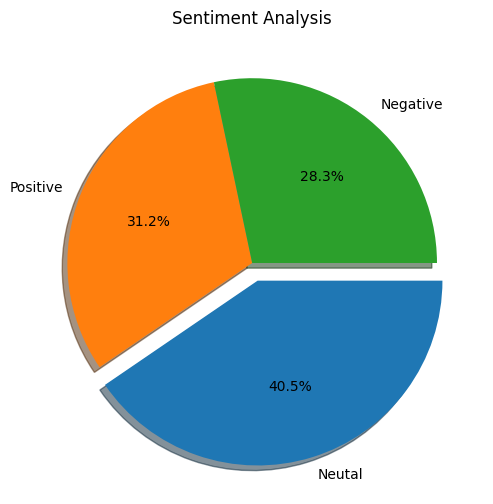

In [11]:
#visualize the dataset using pie chart
#plot the graph
plt.figure(figsize=(6,6))
plt.pie(df['sentiment'].value_counts(),labels=['Neutal','Positive','Negative'],autopct='%1.1f%%',
        counterclock=False,shadow=True,explode=[0.1,0,0])
plt.title('Sentiment Analysis')
plt.show()

In [12]:
df['Age of User'].value_counts()

Age of User
0-20      590
21-30     590
31-45     590
46-60     588
60-70     588
70-100    588
Name: count, dtype: int64

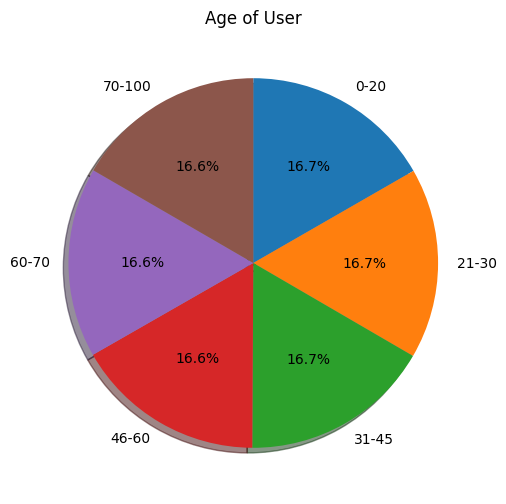

In [13]:
#visualize the dataset using pie chart
#plot the graph
plt.figure(figsize=(6,6))

plt.pie(df['Age of User'].value_counts(),labels=['0-20','21-30','31-45','46-60','60-70','70-100'],
        startangle=90, autopct='%1.1f%%',counterclock=False,shadow=True)
plt.title('Age of User')
plt.show()

In [14]:
# Text Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['text']).toarray()
y = df['sentiment']

In [15]:
# Split the data into training(80%) and testing sets(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Create a  model and  Model Selection
models = {
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(kernel='linear', probability=True,random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [17]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(" ")
    print("Model_Name: -",model_name )
    print("accuracy =" ,accuracy_score(y_test, y_predict))
    print(" ")
    print("precision =", precision_score(y_test, y_predict, average='weighted'))
    print(" ")
    print("recall =" , recall_score(y_test, y_predict, average='weighted'))
    print(" ")
    print("f1 =" , f1_score(y_test, y_predict, average='weighted'))
    print(" ")
    print("Classfication Report= ",classification_report(y_test,y_predict))
    print(" ")
    print("COnfusion Matrix= ",confusion_matrix(y_test,y_predict))

 
Model_Name: - Naive Bayes
accuracy = 0.5827439886845828
 
precision = 0.6671670571951088
 
recall = 0.5827439886845828
 
f1 = 0.5591686632220073
 
Classfication Report=                precision    recall  f1-score   support

    negative       0.79      0.28      0.41       207
     neutral       0.50      0.87      0.64       286
    positive       0.76      0.49      0.59       214

    accuracy                           0.58       707
   macro avg       0.69      0.55      0.55       707
weighted avg       0.67      0.58      0.56       707

 
COnfusion Matrix=  [[ 58 142   7]
 [ 11 250  25]
 [  4 106 104]]
 
Model_Name: - Support Vector Machine
accuracy = 0.637906647807638
 
precision = 0.6653428098496248
 
recall = 0.637906647807638
 
f1 = 0.6353066720026818
 
Classfication Report=                precision    recall  f1-score   support

    negative       0.71      0.50      0.59       207
     neutral       0.56      0.78      0.65       286
    positive       0.76      0.58   

In [ ]:
param_grid = {
    'C': [.1, 1, 10],# regularization parameter 
    'gamma': [1, 0.1, 0.01],# Kernel coefficien
    'kernel': ['linear','rbf']#This specifies that the linear,rbf kernel will be used.
}#initializes GridSearchCV with svc
grid = GridSearchCV(SVC(probability=True), param_grid,refit=True, verbose=2)  #"refit=True" ensures that the best model found during the search will be retrained 

# Fit the GridSearchCV object to your training data
grid.fit(X_train, y_train)
print("\nBest Parameters from Grid Search:")
print(grid.best_params_)
result=grid.cv_results_
scores = cross_val_score(grid.best_estimator_, X, y, cv=5)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.1min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.1min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.1min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.2min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.2min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.2min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.2min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.2min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.2min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.2min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 1.1min
[CV] END ....................C=0.1, gamma=0.1, k

In [23]:
#conveting dataset in tabular form by using pandas
new_df=pd.DataFrame(result)
print(new_df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       65.142185      1.231372         2.587326        0.272850      0.1   
1       70.591887      0.393677         3.791254        0.016217      0.1   
2       62.628154      1.256270         2.388549        0.044351      0.1   
3       68.940657      1.216540         3.852453        0.142968      0.1   
4       63.858919      3.433016         2.475168        0.106243      0.1   
5       75.610445      0.456495         4.474693        0.124303      0.1   
6       62.172130      0.454179         2.420049        0.055749      1.0   
7       79.320254      0.340046         4.429072        0.088719      1.0   
8       62.181894      0.329049         2.403291        0.003564      1.0   
9       76.972369      0.435902         4.482784        0.044296      1.0   
10      62.659542      0.411839         2.408381        0.010985      1.0   
11      77.375624      0.301688         4.421841        0.028039      1.0   

In [24]:
print(new_df[['param_C','param_kernel','mean_test_score','rank_test_score']])

    param_C param_kernel  mean_test_score  rank_test_score
0       0.1       linear         0.429785               12
1       0.1          rbf         0.405377               15
2       0.1       linear         0.429785               12
3       0.1          rbf         0.404669               16
4       0.1       linear         0.429785               12
5       0.1          rbf         0.404669               16
6       1.0       linear         0.616193                2
7       1.0          rbf         0.589317                6
8       1.0       linear         0.616193                2
9       1.0          rbf         0.468341               11
10      1.0       linear         0.616193                2
11      1.0          rbf         0.404669               16
12     10.0       linear         0.577292                7
13     10.0          rbf         0.614429                5
14     10.0       linear         0.577292                7
15     10.0          rbf         0.619734               

In [28]:
# Fit the MultinomialNB model
nb_model = models["Naive Bayes"]
nb_model.fit(X_train, y_train)

# Get the feature log probabilities
feature_log_prob = nb_model.feature_log_prob_

# For each class, you can see which features are the most important
# Here, we'll look at the feature importance for the first class (class 0)
feature_importances = pd.DataFrame(feature_log_prob[0], index=tfidf.get_feature_names_out(), columns=['importance']).sort_values('importance', ascending=False)

print("\nTop 10 Features for Class 0:")
print(feature_importances.head(10))


Top 10 Features for Class 0:
      importance
my     -5.426240
to     -5.429074
the    -5.520829
it     -5.680267
is     -5.762606
and    -5.766567
you    -5.944057
me     -5.987807
that   -6.001656
not    -6.006057


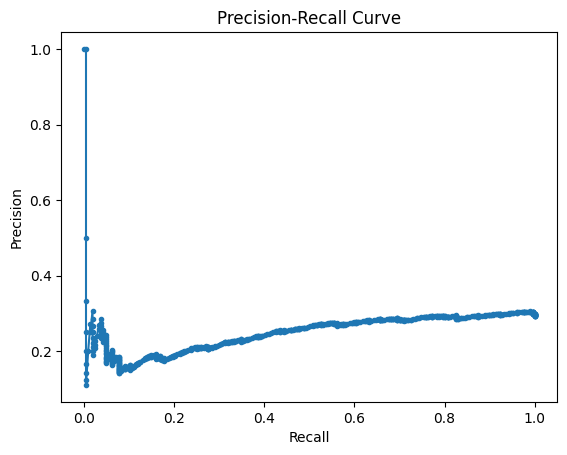

In [32]:
# Evaluation Metrics
y_prob = grid.best_estimator_.predict_proba(X_test)[:,1]
# Convert multiclass target variable to binary format
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))

# Since y_test_binary is a 2D array, we need to select one column
# Let's assume the positive class is the first column (index 0)
y_test_binary = y_test_binary[:, 0]

# Calculate precision, recall, and ROC-AUC score
precision, recall, _ = precision_recall_curve(y_test_binary, y_prob)
roc_auc = roc_auc_score(y_test_binary, y_prob)

# Plot Precision-Recall Curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()